In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer , CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import ConfusionMatrixDisplay , classification_report

In [2]:
df=pd.read_csv('moviereviews.csv')
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [3]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [5]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1965 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 46.1+ KB


In [13]:
df[df['review'].str.isspace()]

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [16]:
#df['review'].str.isspace().sum()
df=df[~df['review'].str.isspace()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


<Axes: xlabel='label', ylabel='count'>

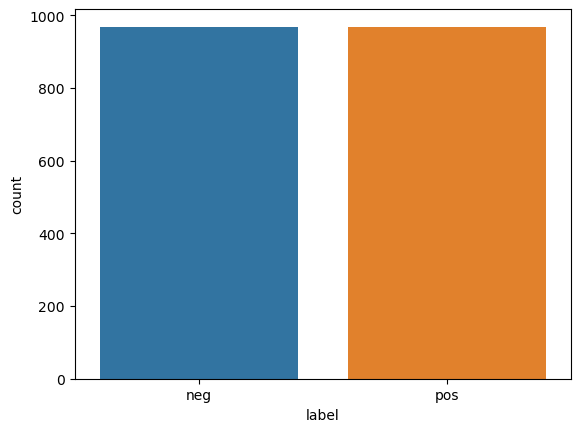

In [17]:
sns.countplot(data=df , x='label' , hue='label')

In [18]:
df['label'].value_counts()

label
neg    969
pos    969
Name: count, dtype: int64

# EDA(for most repeat words)

In [29]:
cnt_vct=CountVectorizer(stop_words='english')
matrix=cnt_vct.fit_transform(df[df['label']=='neg']['review'])
cnt_vct.get_feature_names_out()

array(['00', '000', '007', ..., 'zwick', 'zwigoff', 'zzzzzzz'],
      dtype=object)

In [30]:
matrix.sum(axis = 0).tolist()[0]

[5,
 60,
 3,
 2,
 1,
 2,
 1,
 167,
 39,
 7,
 3,
 16,
 10,
 3,
 1,
 4,
 3,
 3,
 2,
 1,
 1,
 2,
 17,
 1,
 2,
 1,
 4,
 1,
 2,
 28,
 1,
 1,
 2,
 1,
 1,
 2,
 42,
 1,
 1,
 2,
 1,
 7,
 1,
 28,
 10,
 1,
 1,
 32,
 1,
 1,
 1,
 2,
 11,
 6,
 1,
 1,
 1,
 1,
 2,
 18,
 1,
 1,
 1,
 1,
 5,
 18,
 2,
 2,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 1,
 1,
 3,
 7,
 21,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 3,
 1,
 2,
 2,
 1,
 3,
 3,
 3,
 3,
 5,
 1,
 1,
 3,
 1,
 3,
 7,
 8,
 5,
 1,
 4,
 4,
 1,
 6,
 3,
 11,
 3,
 5,
 11,
 7,
 4,
 5,
 5,
 1,
 7,
 5,
 9,
 4,
 11,
 14,
 17,
 9,
 6,
 14,
 14,
 7,
 7,
 13,
 12,
 5,
 10,
 8,
 13,
 24,
 21,
 37,
 34,
 45,
 54,
 1,
 48,
 6,
 1,
 50,
 21,
 23,
 29,
 1,
 1,
 2,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 13,
 2,
 5,
 4,
 1,
 7,
 1,
 5,
 1,
 1,
 1,
 8,
 1,
 12,
 1,
 2,
 2,
 1,
 2,
 2,
 9,
 1,
 5,
 1,
 1,
 2,
 1,
 35,
 3,
 18,
 1,
 1,
 1,
 3,
 6,
 1,
 2,
 2,
 1,
 9,
 3,
 1,
 2,
 6,
 1,
 2,
 21,
 5,
 1,
 1,
 3,
 1,
 7,
 4,
 4,
 1,
 1,
 1,
 5,
 25,
 5,
 2,
 2,
 1,
 1,
 6,
 1,
 2,
 1,


In [35]:
freq=zip(cnt_vct.get_feature_names_out() , matrix.sum(axis=0).tolist()[0])
print(sorted(freq , key=lambda x : -x[1])[:20])

[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634)]


In [36]:
cnt_vct=CountVectorizer(stop_words='english')
matrix_pos=cnt_vct.fit_transform(df[df['label']=='pos']['review'])

In [37]:
frq_pos=zip(cnt_vct.get_feature_names_out() , matrix_pos.sum(axis=0).tolist()[0])
print(sorted(frq_pos , key=lambda x : -x[1])[:20])

[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702)]


# train test split

In [39]:
X=df['review']
y=df['label']
X_train , X_test , y_train , y_test=train_test_split(X , y , random_state=101 , test_size=0.2)

# MultinomialNB model

In [41]:
pipe_nb=Pipeline([('tfidf' , TfidfVectorizer()) , ('nb_model' , MultinomialNB())])
pipe_nb.fit(X_train , y_train)
pred=pipe_nb.predict(X_test)

In [42]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         neg       0.75      0.92      0.83       191
         pos       0.90      0.70      0.79       197

    accuracy                           0.81       388
   macro avg       0.83      0.81      0.81       388
weighted avg       0.83      0.81      0.81       388



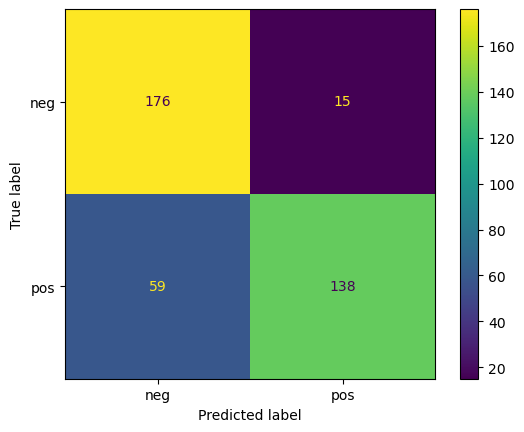

In [43]:
ConfusionMatrixDisplay.from_predictions(y_test , pred)

# Linear suport vector classifire model

In [45]:
pipe_svc=Pipeline([('tfidf' , TfidfVectorizer()),('svc_model' , LinearSVC(dual='auto'))])
pipe_svc.fit(X_train , y_train)
pred_svc=pipe_svc.predict(X_test)

In [46]:
print(classification_report(y_test , pred_svc))

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



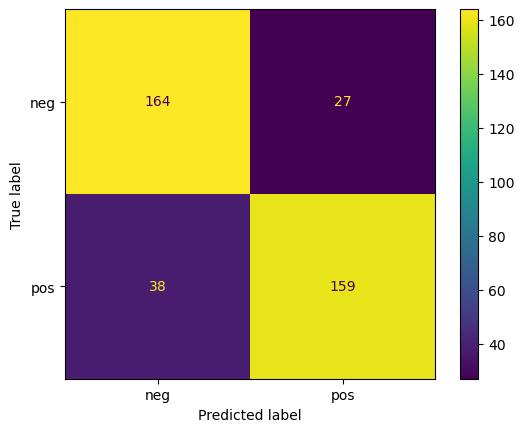

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test , pred_svc)